# GATE output formats and Python

## GATE can output information in different formats:

### From actors, examples:
* SimulationStatisticActor : store number of events, tracks, steps in **ASCII**
* DoseActor : store absorbed dose in **ASCII, ROOT for 1D and 2D**, and **.hdr, .mhd for 3D**
* EnergySpectrumActor: store energy distribution in **ROOT**
* PhaseSpaceActor: store the particle's type, position, direction, energy, ... in **ROOT, IAEA, NumPy**

See https://opengate.readthedocs.io/en/latest/tools_to_interact_with_the_simulation_actors.html

### From imaging "systems" (scanner, CT, SPECT, PET, ...):
* to record interactions: hits, singles, coincidences in **ASCII, binary, ROOT, NumPy**
* to save images: projections and sinograms in **.hdr, .mhd**

See https://opengate.readthedocs.io/en/latest/data_output_management.html

## In summary, when using GATE you will produce one of these output formats:
* ASCII output
* Binary output
* Images (.mhd, .hdr) output
* ROOT tree output
* NumPy tree output (new!)

#### We will first have a look at a GATE example to understand these outputs:
* open a terminal and go to the folder gate_outputs/ex_beam
* look at the different files and open mac/main.mac
* look at all the sections and in particular to the ouputs section
* run the example with  
`Gate --qt mac/main.mac`
* check the output folder and the different files produced

#### We will now analyse each output with this Python notebook !

# From The Notebook

From the notebook, we can execute shell commands, like in a regular terminal.

We can list files with the command `ls`: 

In [5]:
ls ex_beam/

data/  mac/  output/  README.md


In [4]:
ls ex_beam/mac/

main.mac  verbose.mac  visu.mac


Some commands can be executed directly : 

In [9]:
cat ex_beam/mac/main.mac

#=====================================================
# VERBOSITY
#=====================================================

/control/execute                        mac/verbose.mac

#=====================================================
# GEOMETRY
#=====================================================

/gate/geometry/setMaterialDatabase      data/GateMaterials.db

# World
/gate/world/geometry/setXLength         1 m
/gate/world/geometry/setYLength         1 m
/gate/world/geometry/setZLength         1 m
/gate/world/setMaterial                 Air

# Water Box
/gate/world/daughters/name              waterbox
/gate/world/daughters/insert            box
/gate/waterbox/geometry/setXLength      40 cm
/gate/waterbox/geometry/setYLength      40 cm
/gate/waterbox/geometry/setZLength      40 cm
/gate/waterbox/placement/setTranslation 0 0 20 cm
/gate/waterbox/setMaterial              Water
/gate/waterbox/vis/setVisible           1
/gate/waterbox/vis/setColor             blue

# EPID
/gate/world/daug

But some can not and we need to prefix command with a `!` 

In [17]:
du

NameError: name 'du' is not defined

In [18]:
!du

16	./ex_beam/data
16	./ex_beam/mac
30784	./ex_beam/output
30820	./ex_beam
4	./.ipynb_checkpoints
30840	.


Execute command from notebook is powerfull, we can use the output from the command and use it in the notebook: 

In [22]:
a = !du
print(a)

['16\t./ex_beam/data', '16\t./ex_beam/mac', '30784\t./ex_beam/output', '30820\t./ex_beam', '4\t./.ipynb_checkpoints', '30840\t.']


## Exercice: 
Write a python function which print folder name and its size by using output of the command `du`

In [62]:
def f(folder = None):
    if folder is None:
        folder = '.'
    a = !du $folder
    for line in a:        
        size, name = line.split("\t")
        size = int(size)
        print("size\t", size, "kB\t\t", int(size / 1024), "MB", name)

In [65]:
f('ex_beam/')

size	 16 kB		 0 MB ex_beam/data
size	 16 kB		 0 MB ex_beam/mac
size	 30784 kB		 30 MB ex_beam/output
size	 30820 kB		 30 MB ex_beam/


## run the example

In [66]:
cd ex_beam/

/home/mdupont/Documents/DocumentsSync/IR/missions/by_year/2021/2021_03_09_Python GATE School/mathieu/gate-python-training/gate_outputs/ex_beam


In [67]:
ls

data/  mac/  output/  README.md


In [68]:
!Gate mac/main.mac

plop
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecol


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.05 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9494

[Core-0] End of macro mac/main.mac
Graphics systems deleted.
Visualization Manager deleting...


In [69]:
ls output/

1D-depth-Edep-Squared.txt      3D-Edep-Squared.mhd      list-Run.bin
1D-depth-Edep.txt              3D-Edep-Squared.raw      simu-stats.txt
1D-depth-Edep-Uncertainty.txt  3D-Edep-Uncertainty.mhd  tree.hits.npy
3D-Edep.mhd                    3D-Edep-Uncertainty.raw  tree.hits.root
3D-Edep.raw                    list-Hits.bin


## GATE Numpy Tree output 
GATE simulations can now output information on interactions occuring in a detector in a new format: the NumPy .npy Python format. This as several advantages:
* data is easily open in Python.
* data is saved as a [Structured Arrays](https://docs.scipy.org/doc/numpy/user/basics.rec.html) which makes the access to variables very easy.

cf: https://opengate.readthedocs.io/en/latest/data_output_management.html#new-unified-tree-output-root-numpy-and-more

In [70]:
import numpy as np

In [72]:
data = np.load("output/tree.hits.npy")
print("Number of particles: ", len(data))

Number of particles:  59238


In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

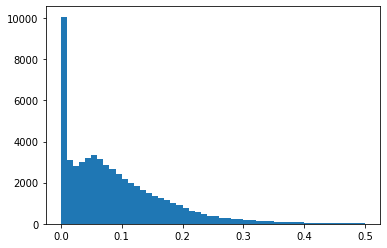

In [77]:
plt.hist(data['edep'], bins=50, range=(0,0.5));

a